# classify the Size_Categorie using SVM

## Import necessary lib

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

## Import dataset

In [2]:
forest_data = pd.read_csv('forestfires.csv')
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


### Initial analysis 

In [3]:
forest_data.shape

(517, 31)

In [4]:
forest_data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [5]:
forest_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

<AxesSubplot:>

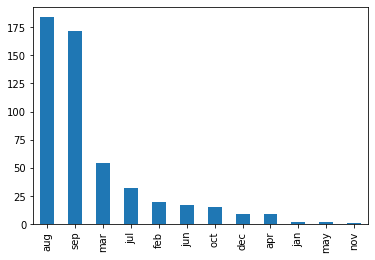

In [6]:
forest_data['month'].value_counts().plot(kind='bar')

<AxesSubplot:>

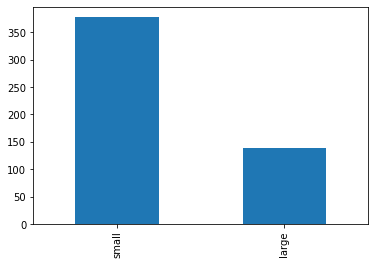

In [8]:
forest_data['size_category'].value_counts().plot(kind='bar')

In [9]:
forest_newdata = forest_data.drop(labels = ['month','day'],axis = 1)
forest_newdata

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [10]:
forest_newdata.dtypes

FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [11]:
forest_newdata['size_category'].unique()

array(['small', 'large'], dtype=object)

In [12]:
forest_newdata['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [28]:
forest_newdata.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Use label encoder

In [29]:
le = LabelEncoder()
forest_newdata['size_category']=le.fit_transform(forest_newdata['size_category'])

In [30]:
forest_newdata.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


<AxesSubplot:>

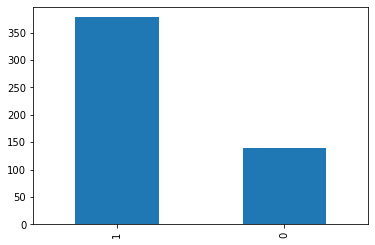

In [31]:
forest_newdata['size_category'].value_counts().plot(kind = 'bar')

In [32]:
min_max = MinMaxScaler()

In [33]:
array = forest_newdata.values

In [35]:
scale_data = min_max.fit_transform(array)

In [36]:
scale_data

array([[0.87096774, 0.08649207, 0.1013252 , ..., 0.        , 0.        ,
        1.        ],
       [0.92774194, 0.11819435, 0.77541926, ..., 1.        , 0.        ,
        1.        ],
       [0.92774194, 0.14679531, 0.79629412, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.8116129 , 0.19159201, 0.77131465, ..., 0.        , 0.        ,
        0.        ],
       [0.97677419, 0.49931082, 0.71162191, ..., 0.        , 0.        ,
        1.        ],
       [0.78451613, 0.00654721, 0.11586725, ..., 0.        , 0.        ,
        1.        ]])

In [37]:
scale_df = pd.DataFrame(scale_data,columns=forest_newdata.columns)
scale_df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
scale_df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,0.928318,0.378264,0.633329,0.160814,0.536629,0.344567,0.401956,0.003385,0.011777,0.164410,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,0.731141
std,0.071227,0.220698,0.290918,0.081274,0.186708,0.191970,0.199073,0.046244,0.058355,0.371006,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,0.443796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.922581,0.232598,0.504046,0.115865,0.427653,0.211765,0.255556,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.940645,0.369400,0.769673,0.149733,0.549839,0.317647,0.400000,0.000000,0.000477,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.957419,0.486906,0.827958,0.192513,0.662379,0.447059,0.500000,0.000000,0.006023,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model building

In [45]:
x = scale_df.drop(labels = 'size_category',axis = 1)
y = scale_df[['size_category']]

In [46]:
x.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [47]:
y.head()

,size_category
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify=y,shuffle=True)

In [49]:
x_train.shape,y_train.shape

((387, 28), (387, 1))

In [50]:
x_test.shape,y_test.shape

((130, 28), (130, 1))

## Use Hyperparameter

In [82]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[50,15,14,13,12,11,10,0.1,0.001]}]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [50, 15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [83]:
gsv.best_params_

{'C': 0.1, 'gamma': 50, 'kernel': 'rbf'}

In [84]:
gsv.best_score_

0.7313090418353576

In [58]:
svm_model = SVC(C=0.1,gamma=50,kernel='rbf')
svm_model.fit(x_train,y_train)

SVC(C=0.1, gamma=50)

In [59]:
# training data
y_train_pred = svm_model.predict(x_train)

In [60]:
accuracy_score(y_train,y_train_pred)

0.7312661498708011

In [64]:
confusion_matrix(y_train,y_train_pred)

array([[  0, 104],
       [  0, 283]], dtype=int64)

In [65]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       104
         1.0       0.73      1.00      0.84       283

    accuracy                           0.73       387
   macro avg       0.37      0.50      0.42       387
weighted avg       0.53      0.73      0.62       387



In [61]:
# testing data
y_test_pred = svm_model.predict(x_test)

In [62]:
accuracy_score(y_test,y_test_pred)

0.7307692307692307

In [66]:
confusion_matrix(y_test,y_test_pred)

array([[ 0, 35],
       [ 0, 95]], dtype=int64)

In [67]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        35
         1.0       0.73      1.00      0.84        95

    accuracy                           0.73       130
   macro avg       0.37      0.50      0.42       130
weighted avg       0.53      0.73      0.62       130



## Create second model

In [69]:
svm_model2 = SVC(C=15,gamma=50,kernel='rbf')
svm_model2.fit(x_train,y_train)

SVC(C=15, gamma=50)

In [70]:
y_pred2 = svm_model2.predict(x_train)

In [71]:
accuracy_score(y_train,y_pred2)

0.9922480620155039

In [78]:
confusion_matrix(y_train,y_pred2)

array([[101,   3],
       [  0, 283]], dtype=int64)

In [85]:
print(classification_report(y_train,y_pred2))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       104
         1.0       0.99      1.00      0.99       283

    accuracy                           0.99       387
   macro avg       0.99      0.99      0.99       387
weighted avg       0.99      0.99      0.99       387



In [86]:
y_test_pred2 = svm_model2.predict(x_test)

In [87]:
accuracy_score(y_test,y_test_pred2)

0.7076923076923077

In [88]:
confusion_matrix(y_test,y_test_pred2)

array([[ 8, 27],
       [11, 84]], dtype=int64)

In [89]:
print(classification_report(y_test,y_test_pred2))

              precision    recall  f1-score   support

         0.0       0.42      0.23      0.30        35
         1.0       0.76      0.88      0.82        95

    accuracy                           0.71       130
   macro avg       0.59      0.56      0.56       130
weighted avg       0.67      0.71      0.68       130



## Create model for actual data

In [90]:
forest_newdata.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [91]:
X = forest_newdata.drop(labels = 'size_category',axis = 1)
Y = forest_newdata[['size_category']]

In [94]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=12)

In [95]:
X_train.shape,Y_train.shape

((387, 28), (387, 1))

In [96]:
X_test.shape,Y_test.shape

((130, 28), (130, 1))

In [122]:
classi = SVC()
param_grid =[{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001]}]
svm = GridSearchCV(classi,param_grid,cv = 10)
svm.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [123]:
svm.best_estimator_

SVC(C=15, gamma=50)

In [124]:
svm.best_params_

{'C': 15, 'gamma': 50, 'kernel': 'rbf'}

In [125]:
svm.best_score_

0.7468286099865047

In [126]:
svm_model3 = SVC(C=15,gamma=50,kernel='rbf')
svm_model3.fit(X_train,Y_train)

SVC(C=15, gamma=50)

In [127]:
y_train_pred3 = svm_model3.predict(X_train)

In [128]:
accuracy_score(Y_train,y_train_pred3)

1.0

In [129]:
confusion_matrix(Y_train,y_train_pred3)

array([[ 98,   0],
       [  0, 289]], dtype=int64)

In [130]:
print(classification_report(Y_train,y_train_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       289

    accuracy                           1.00       387
   macro avg       1.00      1.00      1.00       387
weighted avg       1.00      1.00      1.00       387



In [131]:
y_test_pred3 = svm_model3.predict(X_test)

In [132]:
accuracy_score(Y_test,y_test_pred3)

0.6923076923076923

In [133]:
print(classification_report(Y_train,y_train_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       289

    accuracy                           1.00       387
   macro avg       1.00      1.00      1.00       387
weighted avg       1.00      1.00      1.00       387



In [134]:
confusion_matrix(Y_train,y_train_pred3)

array([[ 98,   0],
       [  0, 289]], dtype=int64)